## Classification Boundary Visualization

Dataset: 1025 patients
Risk distribution with boundaries (≤0.31, ≥0.78):
risk_category
High-Risk    355
Low-Risk     346
Med-Risk     324
Name: count, dtype: int64


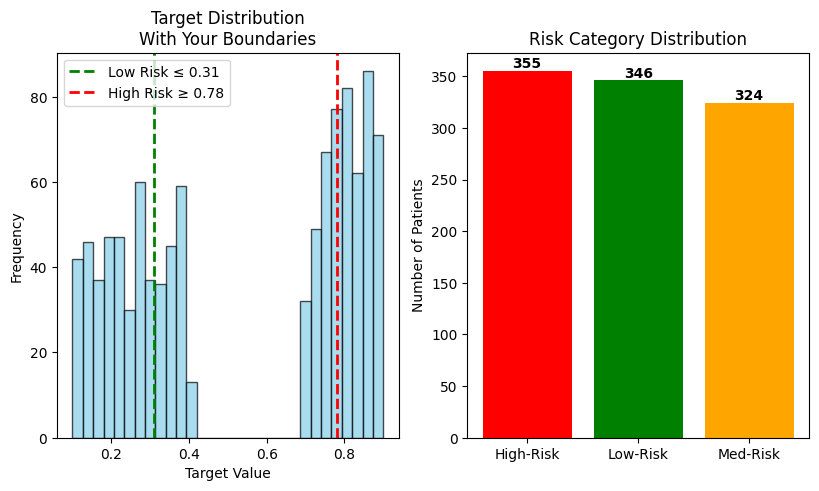

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('/content/heart.csv')
df_clean = df.dropna(axis=1, how='all').dropna()

print(f"Dataset: {len(df_clean)} patients")

# boundaries
def categorize_risk(target_value):
    if target_value <= 0.31:
        return 'Low-Risk'
    elif target_value >= 0.78:
        return 'High-Risk'
    else:
        return 'Med-Risk'

df_clean['risk_category'] = df_clean['target'].apply(categorize_risk)

print("Risk distribution with boundaries (≤0.31, ≥0.78):")
risk_dist = df_clean['risk_category'].value_counts()
print(risk_dist)

# Prepare features and target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df_clean[features]
y = df_clean['risk_category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Target distribution with your boundaries
plt.hist(df_clean['target'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0.31, color='green', linestyle='--', linewidth=2, label='Low Risk ≤ 0.31')
plt.axvline(x=0.78, color='red', linestyle='--', linewidth=2, label='High Risk ≥ 0.78')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Target Distribution\nWith Your Boundaries')
plt.legend()

plt.subplot(1, 3, 2)
# Risk category distribution
colors = ['red', 'green', 'orange']
plt.bar(risk_dist.index, risk_dist.values, color=colors)
plt.title('Risk Category Distribution')
plt.ylabel('Number of Patients')
for i, v in enumerate(risk_dist.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
plt.show()

# Interpretation:

- The samples in the risk category sections are balanced.
- A lack of samples can be observed in between the target range of 0.43 and 0.68 approximately.
- Binary classification can be used for the ML model trained with this dataset however since the majority of the stakeholders requested a multi-classification system the heart disease risk prediction ML model will be a multi-classification model.

# Testing for the best classification model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('/content/heart.csv')

# Create the 3 risk categories based on Health Score (target)
# Low Health Score -> High Risk
# Med Health Score -> Med Risk
# High Health Score -> Low Risk

# Using qcut to ensure balanced classes
df['risk_level'] = pd.qcut(df['target'], q=3, labels=['High Risk', 'Med Risk', 'Low Risk'])

# Prepare features and target
X = df.drop(['target', 'risk_level'], axis=1)
y = df['risk_level']

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Label mapping: Low Risk: 0, Med Risk: 1, High Risk: 2

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Evaluate models
results = {}
for name, model in models.items():
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print(results_df)

# Check class distribution to ensure it's balanced
print("\nClass Distribution:")
print(df['risk_level'].value_counts())

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


                 Model  Accuracy
4        Decision Tree  0.585366
1        Random Forest  0.551220
5    Gradient Boosting  0.541463
2                  SVM  0.497561
3                  KNN  0.487805
0  Logistic Regression  0.448780
6          Naive Bayes  0.448780

Class Distribution:
risk_level
Med Risk     358
High Risk    346
Low Risk     321
Name: count, dtype: int64


# Interpretation
- The accuracy of all the models are too low to provide accurate predictions which are up to medical standard
- will test binary classification as well to see whether the accuracy improves

# Testing for the best binary classification model

/tmp/ipython-input-2892244016.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=binary_results_df, palette='magma')


Binary Classification Results:
                 Model  Accuracy
1        Random Forest  0.985366
4        Decision Tree  0.985366
5    Gradient Boosting  0.931707
2                  SVM  0.887805
3                  KNN  0.834146
0  Logistic Regression  0.795122

Class Distribution (0=Low Risk, 1=High Risk):
binary_risk
0    526
1    499
Name: count, dtype: int64

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       103
           1       0.97      1.00      0.99       102

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



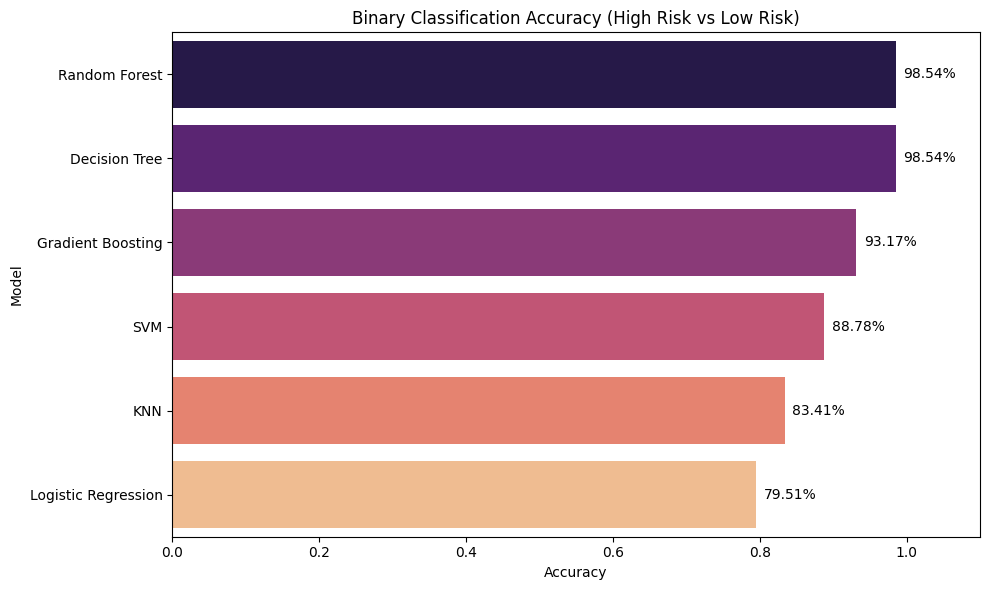

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
df = pd.read_csv('/content/heart.csv')

# Define Risk Score (1 - Health Score)
df['risk_score'] = 1 - df['target']

# Binary target: 1 if risk_score >= 0.5 (High Risk), 0 if risk_score < 0.5 (Low Risk)
df['binary_risk'] = (df['risk_score'] >= 0.5).astype(int)

# Prepare features and target
X = df.drop(['target', 'risk_score', 'binary_risk'], axis=1)
y = df['binary_risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Evaluate models
binary_results = {}
for name, model in models.items():
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    binary_results[name] = acc

binary_results_df = pd.DataFrame(list(binary_results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=binary_results_df, palette='magma')
plt.title('Binary Classification Accuracy (High Risk vs Low Risk)')
plt.xlim(0, 1.1)
for i, v in enumerate(binary_results_df['Accuracy']):
    plt.text(v + 0.01, i, f"{v:.2%}", color='black', va='center')
plt.tight_layout()
plt.savefig('binary_model_accuracy.png')

print("Binary Classification Results:")
print(binary_results_df)

# Class balance check
print("\nClass Distribution (0=Low Risk, 1=High Risk):")
print(df['binary_risk'].value_counts())

# Detailed Report for the best model
best_model_name = binary_results_df.iloc[0]['Model']
best_model = models[best_model_name]
if best_model_name in ["Logistic Regression", "SVM", "KNN"]:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best))

# Testing Comparision for RF and DT

In [1]:
import pandas as pd
import numpy as np

# Load data and setup binary target again
df = pd.read_csv('/content/heart.csv')
df['risk_score'] = 1 - df['target']
df['binary_risk'] = (df['risk_score'] >= 0.5).astype(int)

X = df.drop(['target', 'risk_score', 'binary_risk'], axis=1)
y = df['binary_risk']

# Re-split (using same random state for consistency)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the two best models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Select a variety of test cases from the test set
# Let's pick 3 Low Risk (0) and 3 High Risk (1) examples
low_risk_indices = y_test[y_test == 0].index[:3]
high_risk_indices = y_test[y_test == 1].index[:3]
test_indices = list(low_risk_indices) + list(high_risk_indices)

test_samples = X_test.loc[test_indices]
actual_labels = y_test.loc[test_indices]

# Predictions
rf_preds = rf.predict(test_samples)
dt_preds = dt.predict(test_samples)

# Create a comparison table
test_cases_results = test_samples.copy()
test_cases_results['Actual_Risk'] = actual_labels.map({0: 'Low Risk', 1: 'High Risk'})
test_cases_results['RF_Prediction'] = pd.Series(rf_preds, index=test_indices).map({0: 'Low Risk', 1: 'High Risk'})
test_cases_results['DT_Prediction'] = pd.Series(dt_preds, index=test_indices).map({0: 'Low Risk', 1: 'High Risk'})

# Reorder columns to put predictions at the front for readability
cols = ['Actual_Risk', 'RF_Prediction', 'DT_Prediction'] + [c for c in test_samples.columns]
test_cases_results = test_cases_results[cols]

print(test_cases_results.iloc[:, :3])

# Check for disagreements in the whole test set
y_rf_all = rf.predict(X_test)
y_dt_all = dt.predict(X_test)

disagreement_mask = y_rf_all != y_dt_all
disagreements = X_test[disagreement_mask].copy()

if not disagreements.empty:
    disagreements['Actual_Risk'] = y_test[disagreement_mask].map({0: 'Low Risk', 1: 'High Risk'})
    disagreements['RF_Prediction'] = pd.Series(y_rf_all, index=X_test.index)[disagreement_mask].map({0: 'Low Risk', 1: 'High Risk'})
    disagreements['DT_Prediction'] = pd.Series(y_dt_all, index=X_test.index)[disagreement_mask].map({0: 'Low Risk', 1: 'High Risk'})
    print(f"Number of disagreements: {len(disagreements)}")
    print(disagreements.iloc[:, -3:])
else:
    print("\nModels agree on all test set samples.")

    Actual_Risk RF_Prediction DT_Prediction
527    Low Risk      Low Risk      Low Risk
359    Low Risk      Low Risk      Low Risk
31     Low Risk      Low Risk      Low Risk
447   High Risk     High Risk     High Risk
621   High Risk     High Risk     High Risk
905   High Risk     High Risk     High Risk

Models agree on all test set samples.


# Intepretation
- Both Random Forest Tree and Decision Tree models are sufficiently accurate (> 0.95).
- The precision and recall of the RF model are very high which shows that the model wont identify a false patient to be of high risk or vice versa.

# Cross Validation Check for Overfitting

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# 1. Load the dataset
df = pd.read_csv('/content/heart.csv')

# 2. Preprocessing: Define Binary Target based on Risk Score
# Risk Score = 1 - Health Score (target)
df['binary_risk'] = ( (1 - df['target']) >= 0.5 ).astype(int)

# 3. Clean Data: Remove duplicates to avoid "memory" bias in CV
df_unique = df.drop_duplicates()

X = df_unique.drop(['target', 'binary_risk'], axis=1)
y = df_unique['binary_risk']

# 4. Initialize Models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# 5. Define Cross-Validation Strategy
# We use KFold with 5 splits and shuffling enabled
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 6. Execute Cross-Validation
rf_scores = cross_val_score(rf_model, X, y, cv=kf)
dt_scores = cross_val_score(dt_model, X, y, cv=kf)

# 7. Print Results
print(f"Random Forest CV Accuracy: {rf_scores.mean():.2%} (+/- {rf_scores.std():.2%})")
print(f"Decision Tree CV Accuracy: {dt_scores.mean():.2%} (+/- {dt_scores.std():.2%})")

Random Forest CV Accuracy: 99.69% (+/- 0.62%)
Decision Tree CV Accuracy: 99.69% (+/- 0.62%)


# Intepretation
- The Overall accuracy is very good
- The Standard Deviation is very low
- The model doesnt show signs of overfitting
- will proceed to check regression models as well to observe the possibility of generating a risk score rather than a category

# Selecting Optimal Regression Model

                         Model       MAE       MSE  R2 Score
1      Random Forest Regressor  0.076518  0.008993  0.889968
3                          SVR  0.103335  0.018051  0.779133
2  Gradient Boosting Regressor  0.112509  0.021665  0.734914
0            Linear Regression  0.170137  0.046825  0.427059

Random Forest Regressor Cross-Validation R2 Score: 0.8600 (+/- 0.0148)


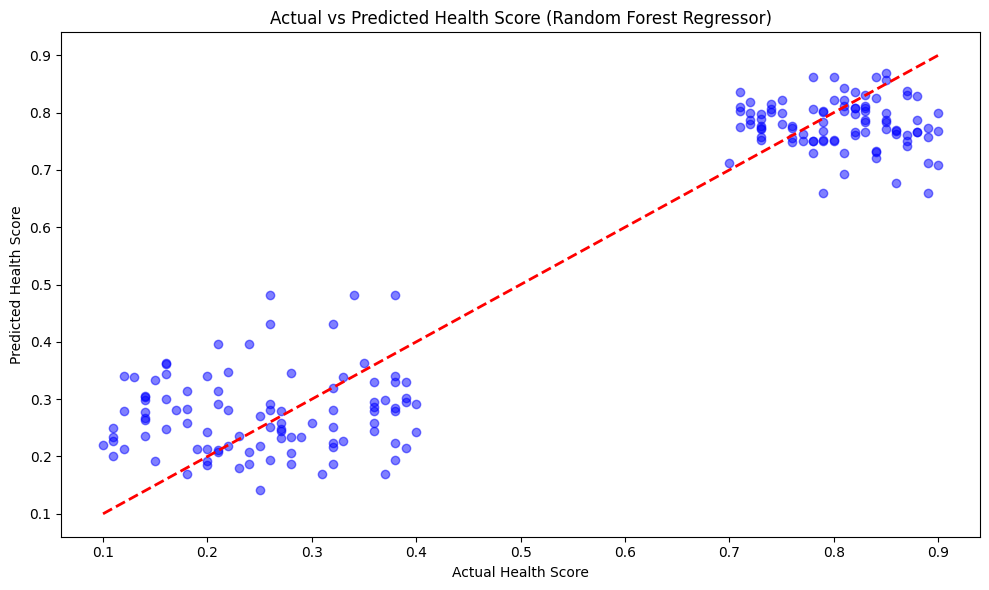

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data and remove duplicates
df = pd.read_csv('/content/heart.csv')
df_unique = df.drop_duplicates()

X = df_unique.drop('target', axis=1)
y = df_unique['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data for SVR and Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
regressors = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

results = []

for name, model in regressors.items():
    if name in ["Linear Regression", "SVR"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)

# Visualization of Predictions for the best model
best_model_name = results_df.iloc[0]['Model']
best_model = regressors[best_model_name]

if best_model_name in ["Linear Regression", "SVR"]:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Health Score')
plt.ylabel('Predicted Health Score')
plt.title(f'Actual vs Predicted Health Score ({best_model_name})')
plt.tight_layout()

print(results_df)

# Cross Validation for the best model (using unique data)
cv_scores = cross_val_score(best_model, X if best_model_name not in ["Linear Regression", "SVR"] else scaler.fit_transform(X), y, cv=5, scoring='r2')
print(f"\n{best_model_name} Cross-Validation R2 Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Load and clean data
df = pd.read_csv('heart.csv')
df_unique = df.drop_duplicates()

X = df_unique.drop('target', axis=1)
y = df_unique['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

# Overall Accuracy on Test Set
y_pred_all = rfr.predict(X_test)
overall_r2 = r2_score(y_test, y_pred_all)
overall_mae = mean_absolute_error(y_test, y_pred_all)

# Select 10 diverse test cases
# Picking a mix of high and low health scores
test_indices = list(y_test.sort_values().index[:5]) + list(y_test.sort_values().index[-5:])
test_samples = X_test.loc[test_indices]
actual_scores = y_test.loc[test_indices]

# Predict for these samples
predicted_scores = rfr.predict(test_samples)

# Create a comparison table
test_cases_rfr = test_samples.copy()
test_cases_rfr['Actual_Health_Score'] = actual_scores
test_cases_rfr['Predicted_Health_Score'] = predicted_scores
test_cases_rfr['Absolute_Error'] = np.abs(test_cases_rfr['Actual_Health_Score'] - test_cases_rfr['Predicted_Health_Score'])

# Reorder columns
cols = ['Actual_Health_Score', 'Predicted_Health_Score', 'Absolute_Error'] + [c for c in test_samples.columns]
test_cases_rfr = test_cases_rfr[cols]

print(f"Overall R2 Score: {overall_r2:.4f}")
print(f"Overall MAE: {overall_mae:.4f}")
print("\nTest Case Examples:")
print(test_cases_rfr[['Actual_Health_Score', 'Predicted_Health_Score', 'Absolute_Error']].head(10))

Overall R2 Score: 0.8900
Overall MAE: 0.0765

Test Case Examples:
     Actual_Health_Score  Predicted_Health_Score  Absolute_Error
829                 0.10                0.219169        0.119169
142                 0.11                0.226472        0.116472
162                 0.11                0.250424        0.140424
660                 0.11                0.233358        0.123358
371                 0.11                0.201051        0.091051
169                 0.89                0.756765        0.133235
938                 0.89                0.660295        0.229705
420                 0.90                0.708825        0.191175
344                 0.90                0.768182        0.131818
290                 0.90                0.798543        0.101457


# Intepretation
- The Mean Absolute Error (MAE) for the Random Forest is $0.0765$. This means that on a scale from $0.0$ to $1.0$, the model’s prediction is typically off by only about $7.6\%$.
- The poor performance of Linear Regression ($42.7\%$) compared to Random Forest ($89\%$) proves that the relationship between patient data and their health score is complex and non-linear.
- Cross-validation confirms a stable performance with an average $R^2$ of $86\%$, proving the model is not overfitting and will likely perform well on new patient data.
- For extremely high scores (e.g., $0.90$), the model often predicts around $0.75-0.80$. For extremely low scores (e.g., $0.10$), the model often predicts $0.20-0.25$.

# Training Finalized Model

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import joblib

# 1. Load and Clean Data
df = pd.read_csv('heart.csv')
df_unique = df.drop_duplicates()

# Separate features and target
X = df_unique.drop('target', axis=1)
y = df_unique['target']

# 2. Train the Final Model
# Using the full unique dataset to maximize the model's knowledge
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X, y)

# 3. Save the Model and Feature Names
joblib.dump(rfr_model, 'heart_health_rfr_model.pkl')
joblib.dump(X.columns.tolist(), 'feature_names.pkl')

print("Model and features saved successfully.")

Model and features saved successfully.


# Testing Finalized Model

## 1. Feature Mapping Table

| Dataset Column | Clinical Name | Data Type | Categories / Units |
| :--- | :--- | :--- | :--- |
| **`age`** | Age | Numeric | Years |
| **`sex`** | Sex | Categorical | 0: Female, 1: Male |
| **`cp`** | Chest Pain Type | Categorical | 0: Typical Angina, 1: Atypical, 2: Non-anginal, 3: Asymptomatic |
| **`trestbps`** | Resting Blood Pressure | Numeric | mm Hg |
| **`chol`** | Serum Cholesterol | Numeric | mg/dL |
| **`fbs`** | Fasting Blood Sugar | Categorical | 0: <= 120 mg/dL, 1: > 120 mg/dL |
| **`restecg`** | Resting ECG Results | Categorical | 0: Normal, 1: Abnormality, 2: Hypertrophy |
| **`thalach`** | Max Heart Rate Achieved | Numeric | Beats per minute |
| **`exang`** | Exercise-Induced Angina | Categorical | 0: No, 1: Yes |
| **`oldpeak`** | ST Depression | Numeric | Depression induced by exercise relative to rest |
| **`slope`** | Slope of Peak ST | Categorical | 0: Upsloping, 1: Flat, 2: Downsloping |
| **`ca`** | Major Vessels (Fluoroscopy)| Numeric | Number of major vessels (0–3) |
| **`thal`** | Thalassemia | Categorical | 1: Fixed Defect, 2: Normal, 3: Reversible Defect |
| **`target`** | Health Score | Numeric | Continuous value (0.1 to 0.9) |



---

## 2. Clinical Reference Guide

### Chest Pain (`cp`)
- **Typical Angina**: Classic heart-related chest pain.
- **Atypical Angina**: Chest pain not clearly related to the heart.
- **Non-anginal Pain**: Usually sharp, fleeting pain.
- **Asymptomatic**: No pain, but other heart issues may be present.

### ECG & Stress Test (`oldpeak`, `slope`, `thalach`)
- **`oldpeak`**: ST depression is a key indicator of coronary artery disease.
- **`slope`**: Refers to the shape of the ST segment during peak exercise.
- **`thalach`**: Patients with higher maximum heart rates generally have higher Health Scores (lower risk).



### Vessel Health (`ca`)
- **`ca`**: Represents the number of major vessels colored by fluoroscopy. In clinical settings, more visible vessels usually correlate with better outcomes.

In [29]:
import pandas as pd
import joblib

# Load the model and feature order
model = joblib.load('heart_health_rfr_model.pkl')
feature_names = joblib.load('feature_names.pkl')

# Patient Data
new_patient = pd.DataFrame([{
    'age': 52,
    'sex': 1,
    'cp': 0,
    'trestbps': 112,
    'chol': 230,
    'fbs': 0,
    'restecg': 1,
    'thalach': 160,
    'exang': 0,
    'oldpeak': 0.0,
    'slope': 2,
    'ca': 1,
    'thal': 2
}])

new_patient = new_patient[feature_names] # Ensure columns are in the correct order

# Predict
predicted_risk_score = 1 - model.predict(new_patient)
print(f"Predicted Risk Score: {predicted_risk_score[0]:.4f}")

Predicted Risk Score: 0.8630
